# Zadanie1: Rozważ dane dotyczące nowotworu piersi.

- Podziel dane na zbiór treningowy i testowy
    
- Dokonaj standaryzacji, a nastepnie przeprowadź algorytm PCA (pamiętaj o: fit_transform na train i transform na test).
    
- Ile komponent należy zostawić aby opisać przynajmniej 90% zmienności tych danych?
    
- Zwizualizuj wyniki wykorzysując jedynie pierwsze dwie komponenty. Pokoloruj obserwacje wg kategorii. Czy kategorie są (przynajmniej częściowo) rozseparowane?
    
- Zbuduj model SVM i/lub Regresji logistycznej na: pełnym zbiorze danych, zredukowanych danych do 6 komponent oraz zredukowanych danych do 2 komponent. Dokonaj oceny tych modeli. Skomentuj otrzymane wyniki.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles

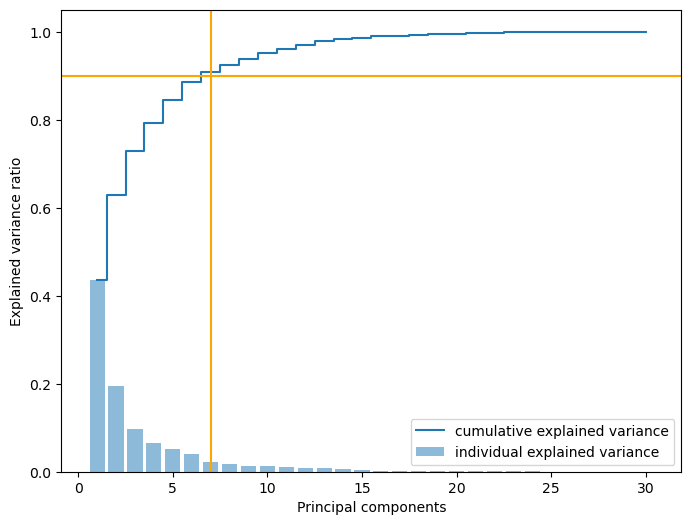

In [ ]:
bc = datasets.load_breast_cancer()

X, y = bc.data, bc.target

#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standarisation
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#pca
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_train_std)

var_exp = pca.explained_variance_ratio_
var_exp_cum = np.cumsum(var_exp) 

plt.figure(figsize=(8,6))
plt.bar( range(1, 31), var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 31), var_exp_cum, where='mid', label='cumulative explained variance')
plt.axhline(0.9, color='orange')
plt.axvline(7, color='orange')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

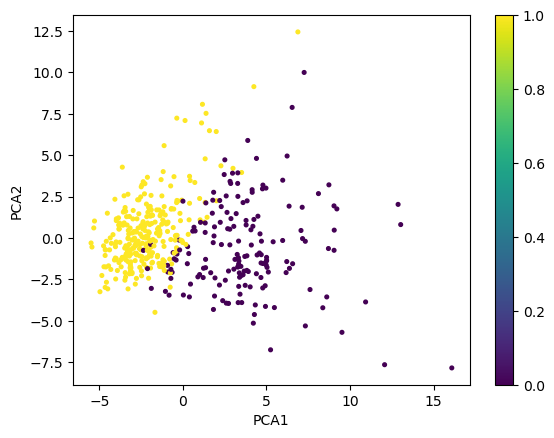

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_train, s = 7)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

#kategorie są z grubsza rozseparaowane :))

## SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#PCA2

pca2 = PCA(2)
X_train_pca2 = pca2.fit_transform(X_train_std)
X_test_pca2 = pca2.transform(X_test_std)

svm = SVC(kernel='linear', C=1., random_state=42) 
svm.fit(X_train_pca2, y_train)

target = ['malignant', 'benign']

yfit = svm.predict(X_test_pca2)
print("------PCA 2:-------------------------------------------------------------------------------\n")
print(classification_report(y_test, yfit, target_names=target))


#PCA 6

pca6 = PCA(6)
X_train_pca6 = pca6.fit_transform(X_train_std)
X_test_pca6 = pca6.transform(X_test_std)

svm = SVC(kernel='linear', C=1., random_state=42) 
svm.fit(X_train_pca6, y_train)

target = ['malignant', 'benign']

yfit = svm.predict(X_test_pca6)
print("------PCA 6:-------------------------------------------------------------------------------\n")
print(classification_report(y_test, yfit, target_names=target))


#PCA 6

pca6 = PCA(n_components=None)
X_train_pca_all = pca6.fit_transform(X_train_std)
X_test_pca_all = pca6.transform(X_test_std)

svm = SVC(kernel='linear', C=1., random_state=42) 
svm.fit(X_train_pca_all, y_train)

target = ['malignant', 'benign']

yfit = svm.predict(X_test_pca_all)
print("------PCA ALL:-------------------------------------------------------------------------------\n")
print(classification_report(y_test, yfit, target_names=target))

------PCA 2:-------------------------------------------------------------------------------

              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

------PCA 6:-------------------------------------------------------------------------------

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

------PCA ALL:-------------------------------------------------------------------------------

              precision    recall  f1-score   support

   maligna

Najlepsze wyniki dla PCA2, 2 wymiary opisywały wystarczający procent danych zeby ładnie je roździelic

## LR

In [ ]:
from sklearn.linear_model import LogisticRegression

#pca 2
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_pca2, y_train)

print("------PCA 2:-------------------------------------------------------------------------------\n")
print(classification_report(y_test, model.predict(X_test_pca2), target_names = target))

#pca 6
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_pca6, y_train)

print("------PCA 6:-------------------------------------------------------------------------------\n")
print(classification_report(y_test, model.predict(X_test_pca6), target_names = target))

#pca all
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_pca_all, y_train)

print("------PCA ALL:-------------------------------------------------------------------------------\n")
print(classification_report(y_test, model.predict(X_test_pca_all), target_names = target))

------PCA 2:-------------------------------------------------------------------------------

              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

------PCA 6:-------------------------------------------------------------------------------

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

------PCA ALL:-------------------------------------------------------------------------------

              precision    recall  f1-score   support

   maligna

analagiczna zależnośc miedzy wielkościa wymiary a dokładnoscią modelu


# Zadanie2:

 Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj PCA ze 150 komponentami. Jaki procent wariancji opisują te komponenty? Narsuj kilka początkowych komponent (wektory własne); oczywiście podobnie jak obrazy są to wektory $64\cdot47$ wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją - zapisz swoją odpowiedź.

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
0.9358692


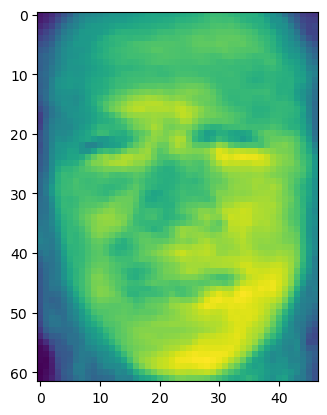

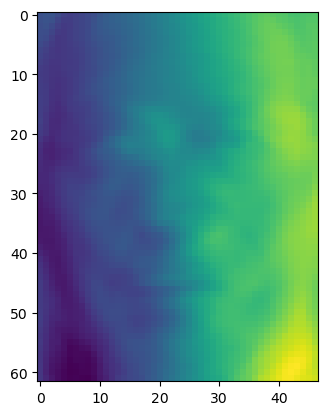

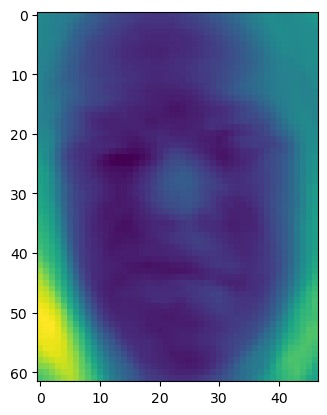

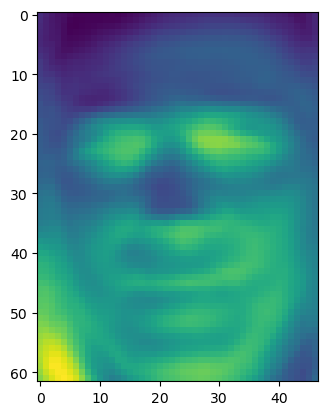

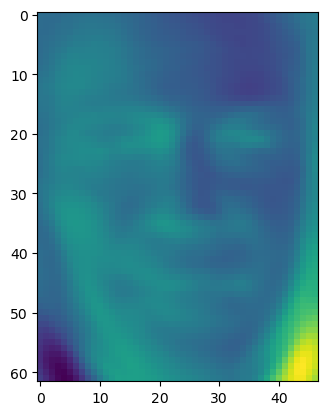

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
 
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)
 
X_train = faces.data
y_train = faces.target

pca = PCA(n_components = 150, whiten = True, random_state = 42)

X_pca = pca.fit_transform(X_train)
print(sum(pca.explained_variance_ratio_)) #opisują 93%
 
for i in range(5):
    plt.imshow(pca.components_[i].reshape(62, 47))
    plt.show()

# Zadanie3: Rozważ dane: https://data.vision.ee.ethz.ch/cvl/ae_dataset

- wybierz trzy przykładowe sygnały (np. violin_0.wav, violin_162.wav, rustle_177.wav)
 
- wygeneruj miksy tych sygnałów (zastosuj wybraną przez siebie macierz mieszającą)
    
- wyświetl: oryginalne sygnały, sygnały zmieszane oraz zrekonstruowane sygnały
    
    
Zwróć uwagę na amplitudy zrekonstruowanych sygnałów wyświetlonych na wykresie. Jeżeli są bardzo małe, należy przeskalować:
    
    
S1_reconstructed = S_reconstructed * (
 2 ** 15 - 1)/np.max(np.abs(S_reconstructed))

In [ ]:
from sklearn.decomposition import FastICA
import wave
import numpy as np

signals = []
paths = ["bird_4.wav", "cat_10.wav", "dog_barking_13.wav"]
minlen = None

for path in paths:
    ex = wave.open(path,'r')
    samplerate = ex.getframerate()
    ex_raw = ex.readframes(-1)
    signal = np.frombuffer(ex_raw, dtype=np.int16)
    signals.append(signal)
    if minlen is None or len(signal) < minlen:
        minlen = len(signal)

signals = [s[:minlen] for s in signals]

#mieszanki niezależne statystycznie dla lepszego wyniku
np.random.seed(42)
weights = np.random.rand(3, 3)  # macierz wag 3x3
X = np.vstack([weights[0,0]*signals[0] + weights[0,1]*signals[1] + weights[0,2]*signals[2],
               weights[1,0]*signals[0] + weights[1,1]*signals[1] + weights[1,2]*signals[2],
               weights[2,0]*signals[0] + weights[2,1]*signals[1] + weights[2,2]*signals[2]]).T

X = (X - X.mean(axis=0)) / X.std(axis=0)

ica = FastICA(n_components=3)
S = ica.fit_transform(X)

pathout = ["restored1.wav", "restored2.wav", "restored3.wav"]

for i in range(3):
    audio = S[:, i]
    audio = audio / np.max(np.abs(audio))
    audio = (audio * (2 ** 15 - 1)).astype("<h")

    with wave.open(pathout[i], "w") as f:
        f.setnchannels(1)
        f.setsampwidth(2)
        f.setframerate(samplerate)
        f.writeframes(audio.tobytes())

Po zastosowaniu wag niezależych statystycznie wyniki mocno sie porpawiły, a otrzymane pliki audio bardzo przypominają orginaly:))

# Zadanie4: Otwórz plik scrna.txt. Zawiera on dane dotyczące ekspresji wybranych genów w pewnej populacji komórek. Informację dotyczącą typu komórek/tkanki można znaleźć w pliku scrna_l.txt - kolumna Tissue_name.

- dokonaj transpozycji tabeli danych
- zastosuj transformację $f(x)=log(x+1)$
- wykonaj algorytm $PCA(k=2)$ i zwizualizuj wyniki, kolorując obserwacje wg grup
- wykonaj algorytm $PCA(k=30)$, a następnie $tSNE(2)$ i zwizualizuj wyniki, kolorując obserwacje wg grup
- skomentuj wyniki otrzymane w dwóch ostatnich podpunktach

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("scrna.txt")
df= df.T
df.columns = df.iloc[0]  #pierwszy = nazwy kolumn
df = df[1:]  #usuń pierwszy wiersz (aktualnie nagłówek)
df = df.reset_index()
df.rename(columns={'index': 'Population'}, inplace=True)
df_cell_name = df["Population"]

df_num = df.drop(columns="Population")
df_num = df_num.apply(pd.to_numeric) 
df_log = np.log1p(df_num)
df_all = pd.concat([df_cell_name, df_log], axis=1)
df_labs = pd.read_csv("scrna_l.txt")
df_all = df_all.merge(df_labs[['Population', 'Tissue_name']], on='Population', how='left')
df_all = df_all.drop(columns="Population")
df_all

,MTND2P28,MTATP6P1,NOC2L,ISG15,CPSF3L,MXRA8,AURKAIP1,CCNL2,MRPL20,SSU72,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP,Tissue_name
0,4.369448,7.627544,0.693147,7.990915,1.098612,0.000000,5.713733,0.000000,5.802118,6.405228,...,5.513429,0.693147,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,DERMAL
1,6.327937,7.580189,4.836282,8.504918,3.761200,0.000000,4.890349,5.463832,6.169611,6.768493,...,8.991811,9.205730,5.398163,7.381502,9.874522,8.587652,7.609367,9.940976,2.397895,DERMAL
2,6.699500,8.501673,4.844187,6.364751,2.995732,0.000000,4.174387,0.000000,5.666427,7.624131,...,9.885731,9.527557,6.959399,7.625595,10.366404,8.513988,7.083388,9.939385,5.170484,DERMAL
3,6.559615,8.391630,0.000000,6.261492,0.000000,0.000000,6.200509,4.442651,5.407172,5.068904,...,9.827470,9.541728,6.867974,7.400621,9.911654,8.834337,7.334329,9.932415,4.927254,DERMAL
4,5.953243,7.867489,6.190315,7.867106,3.637586,0.000000,2.484907,2.639057,3.806662,6.274762,...,9.272846,9.665548,5.123964,7.268223,9.898173,8.732305,7.605890,9.701555,3.850148,DERMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6.322565,7.563201,5.771441,0.000000,4.948760,0.000000,4.077537,6.728629,5.774552,5.509388,...,8.947286,9.067509,6.073045,7.450661,9.653808,8.366603,6.916715,9.020752,3.688879,NEURAL
296,6.738152,7.488294,0.000000,0.000000,4.787492,0.000000,4.836282,3.178054,5.537334,6.442540,...,8.879890,9.494391,6.650279,7.351158,9.572202,9.084324,6.663133,9.046526,4.060443,NEURAL
297,6.056784,7.503290,0.000000,0.000000,0.693147,1.791759,2.890372,7.699842,5.549076,6.843750,...,8.957124,9.539644,6.992096,8.223091,10.052166,9.067278,7.186901,9.525808,2.944439,NEURAL
298,7.445418,8.564840,0.000000,6.536692,0.000000,0.000000,1.098612,2.197225,7.156177,2.484907,...,9.984699,10.742119,7.337588,8.288786,10.631254,9.628195,7.525640,10.224520,4.532599,NEURAL


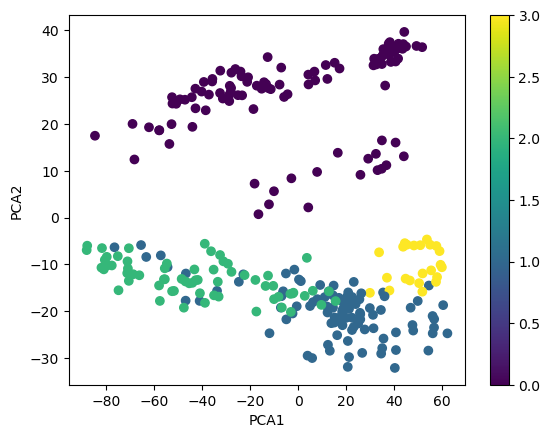

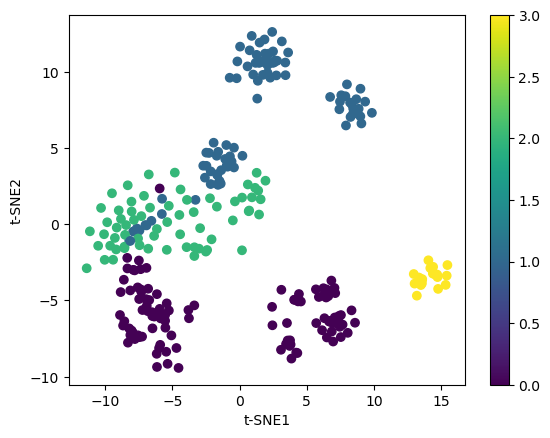

In [60]:
X = df_all.drop(columns = "Tissue_name")
y = df_all["Tissue_name"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y to Twoja kolumna 'Tissue_name'

#standarisation
stdsc = StandardScaler()
X = stdsc.fit_transform(X)

#pca 2
pca = PCA(2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c = y_encoded)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

#pca30 +tsne
pca = PCA(30)
X_pca = pca.fit_transform(X)

from sklearn.manifold import TSNE
X_t = TSNE(n_components=2).fit_transform(X)

plt.scatter(X_t[:,0], X_t[:,1],  c = y_encoded)

plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.colorbar()
plt.show()


r-SNE lepiej poradziło sb z odseparowaniem żółtych, zielonych i niebieskich.  Fioletowe stworzyło 2 klastery w obu metodach.